In [1]:
# canonical import
import pandas as pd

# importing data and dropping na

In [2]:
reddit_df = pd.read_csv('../raw_data/reddit_wsb.csv')
reddit_df = reddit_df.dropna()

In [4]:
reddit_df

,title,score,id,url,comms_num,created,body,timestamp
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10
...,...,...,...,...,...,...,...,...
50689,Weird S&P 500 Correlation to Euro Cup & World Cup,0,o4qwae,https://www.reddit.com/r/wallstreetbets/commen...,14,1.624295e+09,Following is the data and the corresponding S&...,2021-06-21 19:56:54
50690,I $ZIM to the moon,0,o4qu51,https://www.reddit.com/r/wallstreetbets/commen...,10,1.624294e+09,ZIM Integrated Shipping Services should be at ...,2021-06-21 19:52:28
50693,Atypical DD for WSB: ATSG for a smooth ascent,29,o4mcu4,https://www.reddit.com/r/wallstreetbets/commen...,28,1.624276e+09,**TLDR: ATSG is a fantastic value at its curre...,2021-06-21 14:48:18
50694,SENS DD,166,o4m5ju,https://www.reddit.com/r/wallstreetbets/commen...,63,1.624275e+09,SENS why to buy\n Skip to end to see summary \...,2021-06-21 14:36:26


In [5]:
# get ticker list
tickers_df = pd.read_csv('../raw_data/tickers.csv')
tickers_df

,AAIT,iShares MSCI All Country Asia Information Technology Index Fund
0,AAL,"American Airlines Group, Inc."
1,AAME,Atlantic American Corporation
2,AAOI,"Applied Optoelectronics, Inc."
3,AAON,"AAON, Inc."
4,AAPL,Apple Inc.
...,...,...
6259,ZPIN,"Zhaopin Limited American Depositary Shares, ea..."
6260,ZQK,"Quiksilver, Inc. Common Stock"
6261,ZTR,"Zweig Total Return Fund, Inc. (The) Common Stock"
6262,ZTS,Zoetis Inc. Class A Common Stock


In [6]:
bool_index = tickers_df['AAIT'].apply(lambda i: len(i) >= 3)
tickers_df = tickers_df[bool_index]
tickers_df['AAIT']

0        AAL
1       AAME
2       AAOI
3       AAON
4       AAPL
        ... 
6258    ZOES
6259    ZPIN
6260     ZQK
6261     ZTR
6262     ZTS
Name: AAIT, Length: 6016, dtype: object

In [7]:
def include_ticker(string):
    for ticker in tickers_df['AAIT']:
        if ticker.lower() in string.lower():
            return ticker

# Marking the DF

### getting the stock

In [8]:
reddit_df['stock_body'] = reddit_df['body'].map(lambda x: include_ticker(x))
reddit_df
# reddit_df['stock_title'] = reddit_df['title'].map(lambda x: include_ticker(x))

,title,score,id,url,comms_num,created,body,timestamp,stock_body
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,ADI
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,ADI
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,ANAT
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,ANDE
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,ACTS
...,...,...,...,...,...,...,...,...,...
50689,Weird S&P 500 Correlation to Euro Cup & World Cup,0,o4qwae,https://www.reddit.com/r/wallstreetbets/commen...,14,1.624295e+09,Following is the data and the corresponding S&...,2021-06-21 19:56:54,ANY
50690,I $ZIM to the moon,0,o4qu51,https://www.reddit.com/r/wallstreetbets/commen...,10,1.624294e+09,ZIM Integrated Shipping Services should be at ...,2021-06-21 19:52:28,ANY
50693,Atypical DD for WSB: ATSG for a smooth ascent,29,o4mcu4,https://www.reddit.com/r/wallstreetbets/commen...,28,1.624276e+09,**TLDR: ATSG is a fantastic value at its curre...,2021-06-21 14:48:18,ANCI
50694,SENS DD,166,o4m5ju,https://www.reddit.com/r/wallstreetbets/commen...,63,1.624275e+09,SENS why to buy\n Skip to end to see summary \...,2021-06-21 14:36:26,ADI


In [9]:
reddit_df['stock_body'].value_counts().median()

3.0

<AxesSubplot:>

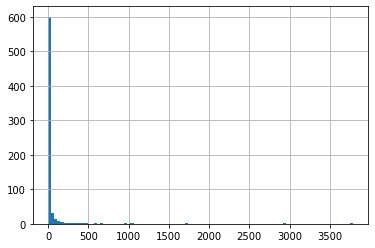

In [10]:
reddit_df['stock_body'].value_counts().hist(bins=100)

In [ ]:
dirt_tickers = ['ACTS', 'ACAD', 'CAM',
       'ANY', 'ENG', 'CCUR', 'ERS', 'SCOR', 'ENT',
       'GAME','AGEN', 'ACT', 'FORM', 'BOOM', 'CALL', 'CAR',
        'COMM', 'DAVE', 'AWAY', 'COOL', 'ELON',
        'CASH', 'CHI', 'ALL', 'DATE', 'LIVE', 'BIN', 'HAS', 'VIEW',
        'SHOR', 'MORN', 'DOC', 'AIN', 'NICE''MAR', 'TRUE', 'LION', 'BIG', 'FUND', 'WIN',
        'AHH', 'ELSE', 'CENT', 'AFT', 'RAND', 'GOOD', 'ACC','FREE', 'NOW', 'ARE', 'LONG', 'ESS', 'PRE', 'FAM', 'CERN', 'TUBE', 'NSP', 'DRIV',        
        'ARG',  'MORE', 'LEG', 'FISH', 'ESSA', 'LOCK', 'AIR', 'EVER', 'COST', 'EARS',
        'OUT', 'PAR', 'HEAR', 'FIG', 'PEOP', 'STO', 'MON', 'BIND', 'LINE', 'ISH','TREE',
        'FAST', 'FUL', 'BEAT', 'NAME', 'FOR', 'CRY', 'EXPO','ROCK', 'SHOO', 'PLAY',
        'ELS', 'ELP', 'ESE', 'BIT', 'ING', 'LOOK', 'MEET', 'GROW', 'SHIP', 'ASH',        
        'INT','NEWS', 'FIVE', 'CUBA', 'ANN','FLAT', 'FLY', 'LOW', 'HALL', 'GOLD', 'STAY', 'TOO', 'PLUG', 'CAMP',
        'BLUE', 'STEM', 'BEE', 'STAR','SEE', 'LAKE', 'MIND','ICE',  'CALM', 'SAVE', 'LAWS', 'BID', 'STR', 
        'TECH', 'TRIP', 'LAND','FUEL', 'HILL', 'FULL', 'ONE',  'CORE', 'EAT',  
        'GOV', 'TEN', 'CONN', 'ORIG', 'TYPE',  'NERV', 'JACK', 'FUN',  'USA', 'HERO', 'THOR', 'EMO', 
        'FOLD', 'RICK', 'TAST', 'CLUB','NEE', 'KEY', 'EYES', 'GLAD', 'TOPS', 'AGO', 'CHOP', 'ROLL', 'SAGE', 'SPIL', 'PLUS', 
        'WAT', 'ICON' 'MUS', 'SONS', 'DOOR', 'MIN', 'CUZ', 'GIGA', 'SPOK', 'CRIS', 'CAKE', 'POOL', 'FATE', 
        'FARM', 'TIME','CONE', 'FUNC', 'BREW',
                

In [11]:
reddit_df['stock_body'].unique()

array(['ADI', 'ANAT', 'ANDE', 'ACTS', 'ACAD', 'ANCI', 'ADES', 'CAM',
       'ANY', 'ENG', 'CCUR', 'ERI', 'BASI', 'ERS', 'SCOR', 'ENT', 'ONVI',
       'APPY', 'ABY', 'GAME', 'ANIP', 'AMAT', 'AZO', 'AKER', 'AGEN',
       'ACT', 'AMD', 'FORM', 'BOOM', 'CALL', 'CAR', 'ARIA', 'ANGI',
       'COMM', 'DAVE', 'AWAY', 'EDS', 'AMED', 'COOL', 'AMC', 'ELON',
       'EEI', 'CASH', 'CHI', 'ALL', 'DATE', 'LIVE', 'BIN', 'HAS', 'VIEW',
       'SHOR', None, 'RADA', 'GOOG', 'MORN', 'DOC', 'ECTE', 'AIN', 'NICE',
       'MAR', 'GME', 'TRUE', 'AAL', 'LION', 'DEPO', 'BIG', 'FUND', 'WIN',
       'CHW', 'KIN', 'BBBY', 'AHH', 'PROV', 'ELSE', 'DIN', 'HTS', 'ATOS',
       'AIT', 'BOI', 'CENT', 'AFT', 'RAND', 'GOOD', 'LABL', 'ACC', 'DOW',
       'FREE', 'ACH', 'IMI', 'BLIN', 'SKT', 'OMED', 'SGC', 'FLO', 'ISM',
       'GENE', 'NOW', 'CLVS', 'ARE', 'EPAY', 'BAC', 'CEL', 'LONG', 'ASTE',
       'ESS', 'III', 'IBKR', 'PRE', 'FAM', 'CERN', 'TUBE', 'NSP', 'DRIV',
       'ISTR', 'EEP', 'GAI', 'ACRX', 'ARG', 'VIA', 'MORE',

In [ ]:
# bool_index = tickers_df['AAIT'].apply(lambda i: len(i) >= 3)
# tickers_df = tickers_df[bool_index]
# tickers_df['AAIT']



# median_index = reddit_df['stock_body'].value_counts() > 34
# median_index_df = pd.DataFrame(median_index)
# median_index_df = median_index_df[median_index]
# target_tickers = median_index_df.index.tolist()

In [ ]:
bool_index = reddit_df['stock_body'].apply(lambda i: i in tickers_df['AAIT'])
reddit_df = reddit_df[bool_index]
reddit_df

In [ ]:
reddit_df['stock_body'].unique().sort()

In [ ]:
reddit_df['stock_body'].sort_values().unique()

In [ ]:
reddit_df['stock_body'].value_counts()

dirt_index = reddit_df['stock_body'].apply(lambda i: i not in dirt_tickers) 

reddit_df = reddit_df[dirt_index]
reddit_df['stock_body'].value_counts()